# **Análisis Estadístico y Exploratorio de Datos usando las APIS JSONPlaceholder y TheSportsDB**

# Primero analizamos la API JSONPlaceholder :

In [23]:
# Ingresamos las librerias y la url
import requests
import pandas as pd

# URL 
url_users = 'https://jsonplaceholder.typicode.com/users'
url_posts = 'https://jsonplaceholder.typicode.com/posts'

# Usamos get para los resultados y los almacenamos
response_users = requests.get(url_users)
response_posts = requests.get(url_posts)

# Verificamos si las solicitudes fueron exitosas
if response_users.status_code == 200 and response_posts.status_code == 200:
    users_data = response_users.json()
    posts_data = response_posts.json()
    df_users = pd.DataFrame(users_data)
    df_posts = pd.DataFrame(posts_data)
     
else:
    print("Error al obtener los datos de la API.")

df_users.head()
df_posts.head()

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


In [24]:
# Analizamos los fdatos obtenidos
df_users.info() # usuarios
df_posts.info() #publicaciones

# Estadísticas descriptivas 
df_users.describe()
df_posts.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10 non-null     int64 
 1   name      10 non-null     object
 2   username  10 non-null     object
 3   email     10 non-null     object
 4   address   10 non-null     object
 5   phone     10 non-null     object
 6   website   10 non-null     object
 7   company   10 non-null     object
dtypes: int64(1), object(7)
memory usage: 772.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  100 non-null    int64 
 1   id      100 non-null    int64 
 2   title   100 non-null    object
 3   body    100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


,userId,id
count,100.000000,100.000000
mean,5.500000,50.500000
std,2.886751,29.011492
min,1.000000,1.000000
25%,3.000000,25.750000
50%,5.500000,50.500000
75%,8.000000,75.250000
max,10.000000,100.000000


In [25]:
# Limpiamos los datos
# Revisamos si hay datos nulos
df_users.isnull().sum(), df_posts.isnull().sum()

# Creamos una columna nueva con nombre y correo de los usuarios
df_users['full_name'] = df_users['name'] + ' (' + df_users['email'] + ')'
df_users.head()


,id,name,username,email,address,phone,website,company,full_name
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu...",Leanne Graham (Sincere@april.biz)
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac...",Ervin Howell (Shanna@melissa.tv)
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ...",Clementine Bauch (Nathan@yesenia.net)
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult...",Patricia Lebsack (Julianne.OConner@kory.org)
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c...",Chelsey Dietrich (Lucio_Hettinger@annie.ca)


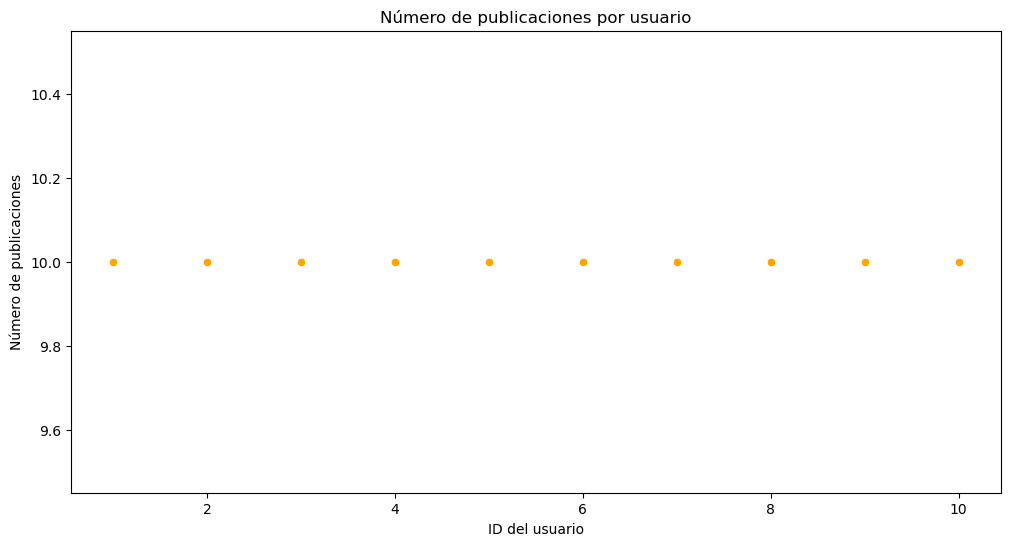

In [29]:
# Numero de publicaciones por usuario
posts_per_user = df_posts.groupby('userId').size().reset_index(name='num_posts')

# Generamos un gráfico de dispersión 
plt.figure(figsize=(12, 6))
sns.scatterplot(x=posts_per_user['userId'], y=posts_per_user['num_posts'], color='orange')
plt.title('Número de publicaciones por usuario')
plt.xlabel('ID del usuario')
plt.ylabel('Número de publicaciones')
plt.show()


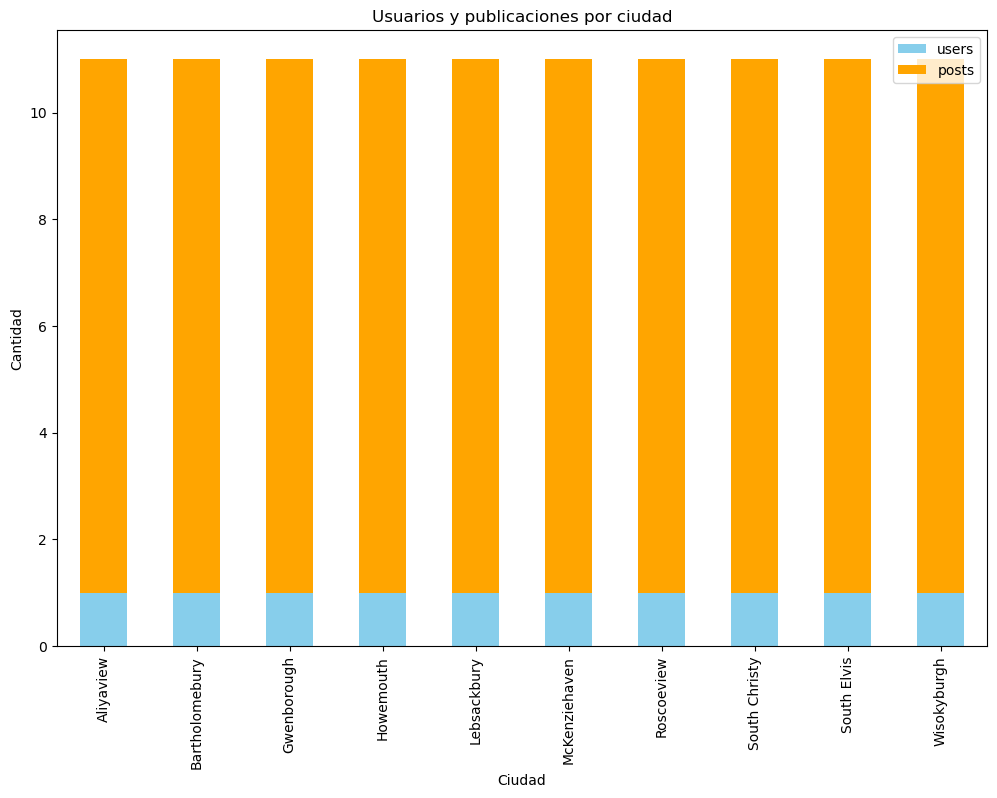

In [21]:
# Comparación de publicaciones y usuarios en cada ciudad y graficamos
city_users = df_users.groupby(df_users['address'].apply(lambda x: x['city'])).size()
city_posts = df_users_posts.groupby(df_users_posts['address'].apply(lambda x: x['city'])).size()

df_city_comparison = pd.DataFrame({
    'users': city_users,
    'posts': city_posts
}).reset_index()

df_city_comparison.set_index('address').plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Usuarios y publicaciones por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

# Este gráfico de barras apiladas muestra el total de usuarios y publicaciones en cada ciudad, 
# lo que permite una comparación visual de cómo se distribuyen los usuarios y las publicaciones en diferentes ciudades.

# Ahora usamos la API TheSportsDB : Revisando el cronograma de partidos de futbol disponibles

In [32]:
import matplotlib.pyplot as plt
# Usamos el id mostrado para elegir la categoria futbol de Reino Unido
url = "https://www.thesportsdb.com/api/v1/json/3/eventsnext.php?id=133602"
response = requests.get(url)

print("Status code:", response.status_code)
data = response.json()
# El resultado 200 indica que la API funciona correctamente

Status code: 200


In [33]:
# Se muestran los eventos disponibles
events = data.get("events", [])
print(events)

[{'idEvent': '2274889', 'idAPIfootball': '1387358', 'strEvent': 'Bolton Wanderers vs Rotherham United', 'strEventAlternate': 'Rotherham United @ Bolton Wanderers', 'strFilename': 'English League 1 2025-12-26 Bolton Wanderers vs Rotherham United', 'strSport': 'Soccer', 'idLeague': '4396', 'strLeague': 'English League 1', 'strLeagueBadge': 'https://r2.thesportsdb.com/images/media/league/badge/afedb31688770443.png', 'strSeason': '2025-2026', 'strDescriptionEN': None, 'strHomeTeam': 'Bolton Wanderers', 'strAwayTeam': 'Rotherham United', 'intHomeScore': None, 'intRound': '22', 'intAwayScore': None, 'intSpectators': None, 'strOfficial': '', 'strTimestamp': '2025-12-26T15:00:00', 'dateEvent': '2025-12-26', 'dateEventLocal': None, 'strTime': '15:00:00', 'strTimeLocal': None, 'strGroup': None, 'idHomeTeam': '133606', 'strHomeTeamBadge': 'https://r2.thesportsdb.com/images/media/team/badge/yvxxrv1448808301.png', 'idAwayTeam': '134231', 'strAwayTeamBadge': 'https://r2.thesportsdb.com/images/media/

In [34]:
# Seleccionamos los datos importantes de cada partido disponible y lo colocamos en un data frame
events_data = []

for event in events:
    events_data.append({
        "Evento": event.get("strEvent"),
        "Deporte": event.get("strSport"),
        "Liga": event.get("strLeague"),
        "Fecha": event.get("dateEvent"),
        "Hora": event.get("strTime")
    })

df = pd.DataFrame(events_data)
df


,Evento,Deporte,Liga,Fecha,Hora
0,Bolton Wanderers vs Rotherham United,Soccer,English League 1,2025-12-26,15:00:00
1,Bolton Wanderers vs Mansfield Town,Soccer,English League 1,2025-12-29,19:45:00
2,Doncaster Rovers vs Bolton Wanderers,Soccer,English League 1,2026-01-01,15:00:00
3,Bolton Wanderers vs Northampton Town,Soccer,English League 1,2026-01-04,12:00:00
4,Peterborough United vs Bolton Wanderers,Soccer,English League 1,2026-01-10,15:00:00
5,Bolton Wanderers vs Port Vale,Soccer,EFL Trophy,2026-01-13,00:00:00
6,Wigan Athletic vs Bolton Wanderers,Soccer,English League 1,2026-01-17,12:30:00
7,Stevenage vs Bolton Wanderers,Soccer,English League 1,2026-01-20,19:45:00
8,Bolton Wanderers vs Leyton Orient,Soccer,English League 1,2026-01-24,15:00:00
9,Bolton Wanderers vs Burton Albion,Soccer,English League 1,2026-01-27,19:45:00


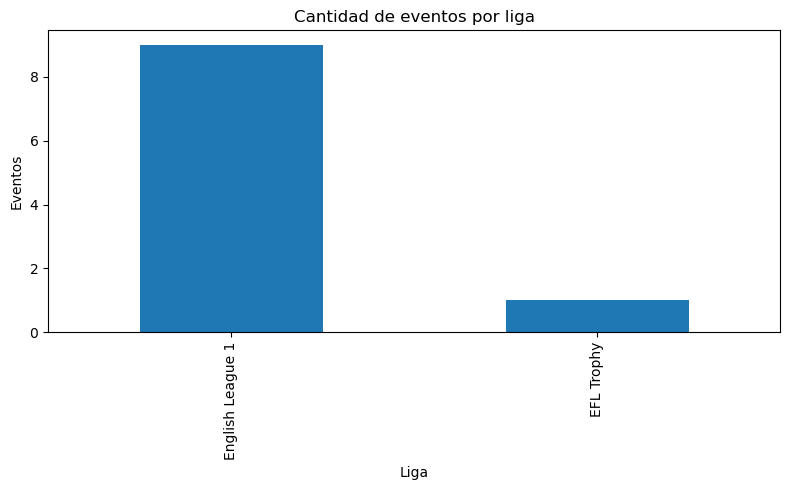

In [36]:
# Graficamos
plt.figure(figsize=(8,5))
df["Liga"].value_counts().plot(kind="bar")
plt.title("Cantidad de eventos por liga")
plt.ylabel("Eventos")
plt.xlabel("Liga")
plt.tight_layout()
plt.show()

In [37]:
# Revisamos los partidos de futbol y basquet disponibles y los mostramos en un data frame
# Usamos el id de cada uno de estos deportes y los juntamos
sports_ids = {
    "Fútbol": 133602,
    "Baloncesto": 4387
}

all_events = []

for sport, sport_id in sports_ids.items():
    url = f"https://www.thesportsdb.com/api/v1/json/3/eventsnext.php?id={sport_id}"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        events = data.get("events", [])

        for event in events:
            all_events.append({
                "Deporte": sport,
                "Evento": event.get("strEvent"),
                "Fecha": event.get("dateEvent")
            })

df = pd.DataFrame(all_events)
df

,Deporte,Evento,Fecha
0,Fútbol,Bolton Wanderers vs Rotherham United,2025-12-26
1,Fútbol,Bolton Wanderers vs Mansfield Town,2025-12-29
2,Fútbol,Doncaster Rovers vs Bolton Wanderers,2026-01-01
3,Fútbol,Bolton Wanderers vs Northampton Town,2026-01-04
4,Fútbol,Peterborough United vs Bolton Wanderers,2026-01-10
5,Fútbol,Bolton Wanderers vs Port Vale,2026-01-13
6,Fútbol,Wigan Athletic vs Bolton Wanderers,2026-01-17
7,Fútbol,Stevenage vs Bolton Wanderers,2026-01-20
8,Fútbol,Bolton Wanderers vs Leyton Orient,2026-01-24
9,Fútbol,Bolton Wanderers vs Burton Albion,2026-01-27
